# Understanding Seattle Airbnb Dataset for Price Modeling

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [15]:
######pip freeze > requirements.txt

In [3]:

mydf = pd.read_csv('airbnb_listings.csv')
mydf.shape

(3818, 92)

In [4]:
mydf.head()
# remove $ sign from price column and convert it to float
mydf['price'] = mydf['price'].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\mitraind\AppData\Local\Temp\ipykernel_31200\2006918935.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mydf['price'] = mydf['price'].str.replace(',', '').str.replace('$', '').astype(float)


The listings show each house's informations so I would like to know more about this dataset, starting with the column names and data types of each house.

In [5]:
mydf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Finding out the quantitative desriptors of the dataset:

In [6]:
mydf.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


#### Question-1 :  What are the most common utilities?

The utilities available in a housing can provide the key features which are most prominent for a listing 

We construct the the list of available utilities. 

In [7]:
#I first create an empty list to fill with amenities available.
list_of_utilities = []

#create a for loop to append all amenities values from the dataset into the list.
for i in range(len(mydf)):
    list_of_utilities.append(mydf['amenities'][i])

    
# The set and strip functions in python are used to extract the unique amenities to a list
list_of_utilities = list((s.strip('\'\{\}') for s in list_of_utilities))
list_of_utilities_string = ",".join(list_of_utilities)
list_of_utilities = list(set(list_of_utilities_string.split(",")))

#Remove the empty string of the list of utilities
nonempty_list_of_utilities = []
for string in list_of_utilities:
    if (string != ""):
      nonempty_list_of_utilities.append(string)
list_of_utilities = nonempty_list_of_utilities

In [8]:
def count(df, colA, colB, search):
    
    ### Function used from udacity class to find out the grouping of ameneties in each list
    '''
    INPUT:
    df - the pandas dataframe to search
    colA - the column we want to search
    col2 - the column we want to count values from
    search - a list of strings we want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each search with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in search:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[colA][idx]:
                new_df[val] += int(df[colB][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [colA, colB]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

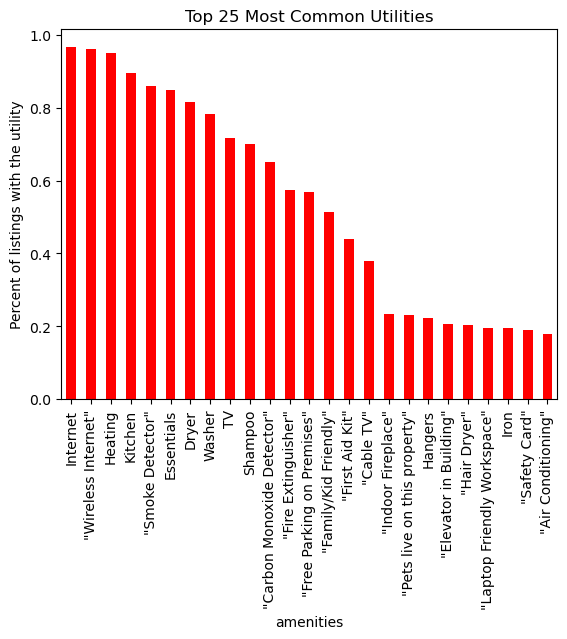

In [9]:
#We generate the X,Y variables in a dataframe named amen_count with amenities and count of the amenities

## Create dataframe for amenities and counts
amen_count = mydf['amenities'].value_counts().reset_index()
amen_count.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#The count function, counts the number of listings that contains each amenity from the amenities list.
amc_df = count(amen_count, 'amenities', 'count', list_of_utilities)
amc_df.set_index('amenities', inplace=True)

#Bar chart created to show the percentage of each amenity .
(amc_df/len(mydf))[:25].plot(kind='bar', legend=None, color='red');
plt.title('Top 25 Most Common Utilities');
plt.ylabel('Percent of listings with the utility')
plt.show()

### Findings

In the above chart you can see that the most common amenities in Seattle listings are:
- Internet
- Wireless Internet
- Heating
- Kitchen
- Smoke Detector
- Essentials



Whereas the least common amenities in Seattle listings are:
- Lock on Bedroom Door
- Doorman
- Smoking Allowed
- Other pet(s)
- Washer / Dryer

#### Question-2

The next question what we try to find  is to figure out the most expensive and least expensive neighbourhoods for Seattle AirBnB renting. We look into the 
neighbourhood group column along and figure out a bar plot. 


<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

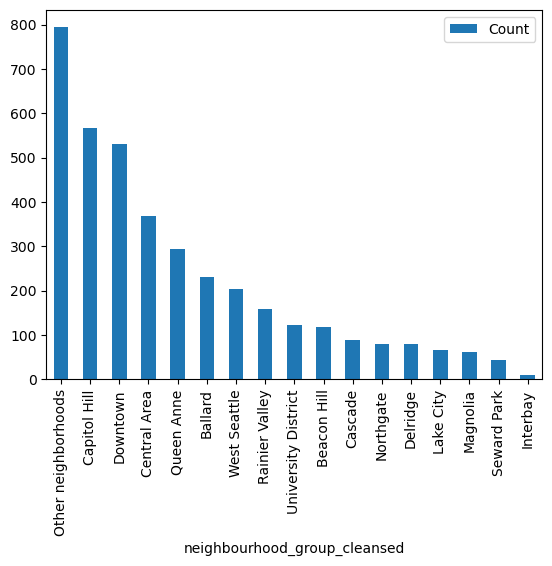

In [10]:
### Find the most expensive neighbourhoods in Seattle for AirBnB
grdf = mydf.groupby(["neighbourhood_group_cleansed"]).size().reset_index(name="Count")
neig_df = grdf.sort_values(by=['Count'], ascending=False)
####labels = grdf.neighbourhood_group_cleansed.to_list()

neig_df.plot(x="neighbourhood_group_cleansed", y="Count", kind="bar")

### Findings

The above plot explicitly shows that even though most of the areas are grouped as other listings, the top 3 listings 
are defined in the areas of Capitol Hill, Downtown and Central Ave.The areas like Cascade/Northgate/Delridge have least listings. 

#### Question-3

Now in this part we will like to find out how the listings in different areas of Seattle are distributed by property type? We will like to see if there is a pattern in the property types in various areas. 


In [11]:
df_copy = mydf.copy()
findf = mydf.copy()
dfprop= mydf.copy()


Text(0.5, 0, 'Property Type')

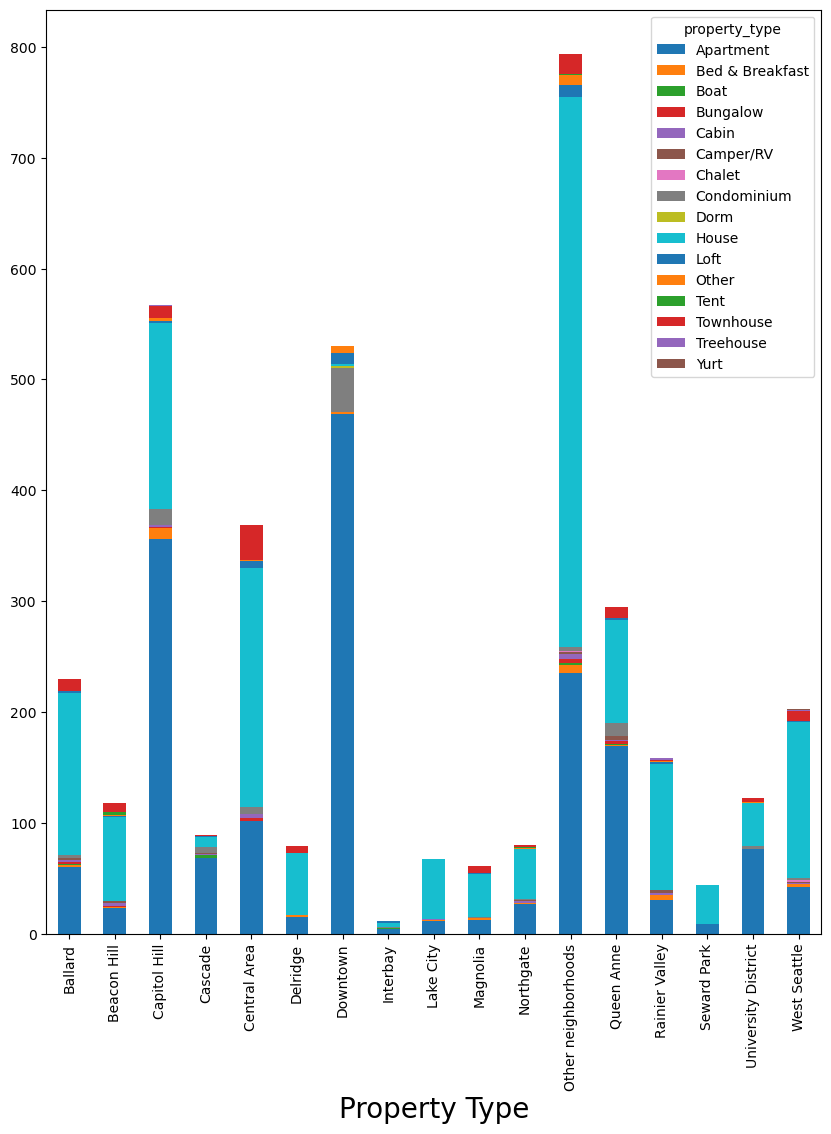

In [12]:
#######Bar plot showing the number of listings corresponding to different neighbourhoods######

dfprop = dfprop.groupby(['property_type', 'neighbourhood_group_cleansed']).size().reset_index().pivot(columns='property_type', index='neighbourhood_group_cleansed', values=0)
ax = dfprop.plot(kind='bar', stacked=True, figsize=(10,12))
ax.set_xlabel('Property Type', fontsize=20)

### Findings

We look into some different aspects of the listings in different neighborhoods in the above plot. We try to find out how are property types dependent on 
different areas of Seattle There are some important features of listings which is clear from the plot below which clearly shows that 
except in Downtown, Capitol Hill and Queen Anne, in most of the areas houses are the primary property types. 
In those three areas, Apartment forms the maximum listings.

#### Question-4

The problem we like to answer or explore here is to figure out how the quantitative variables are distributed and the correlation between the variables. 


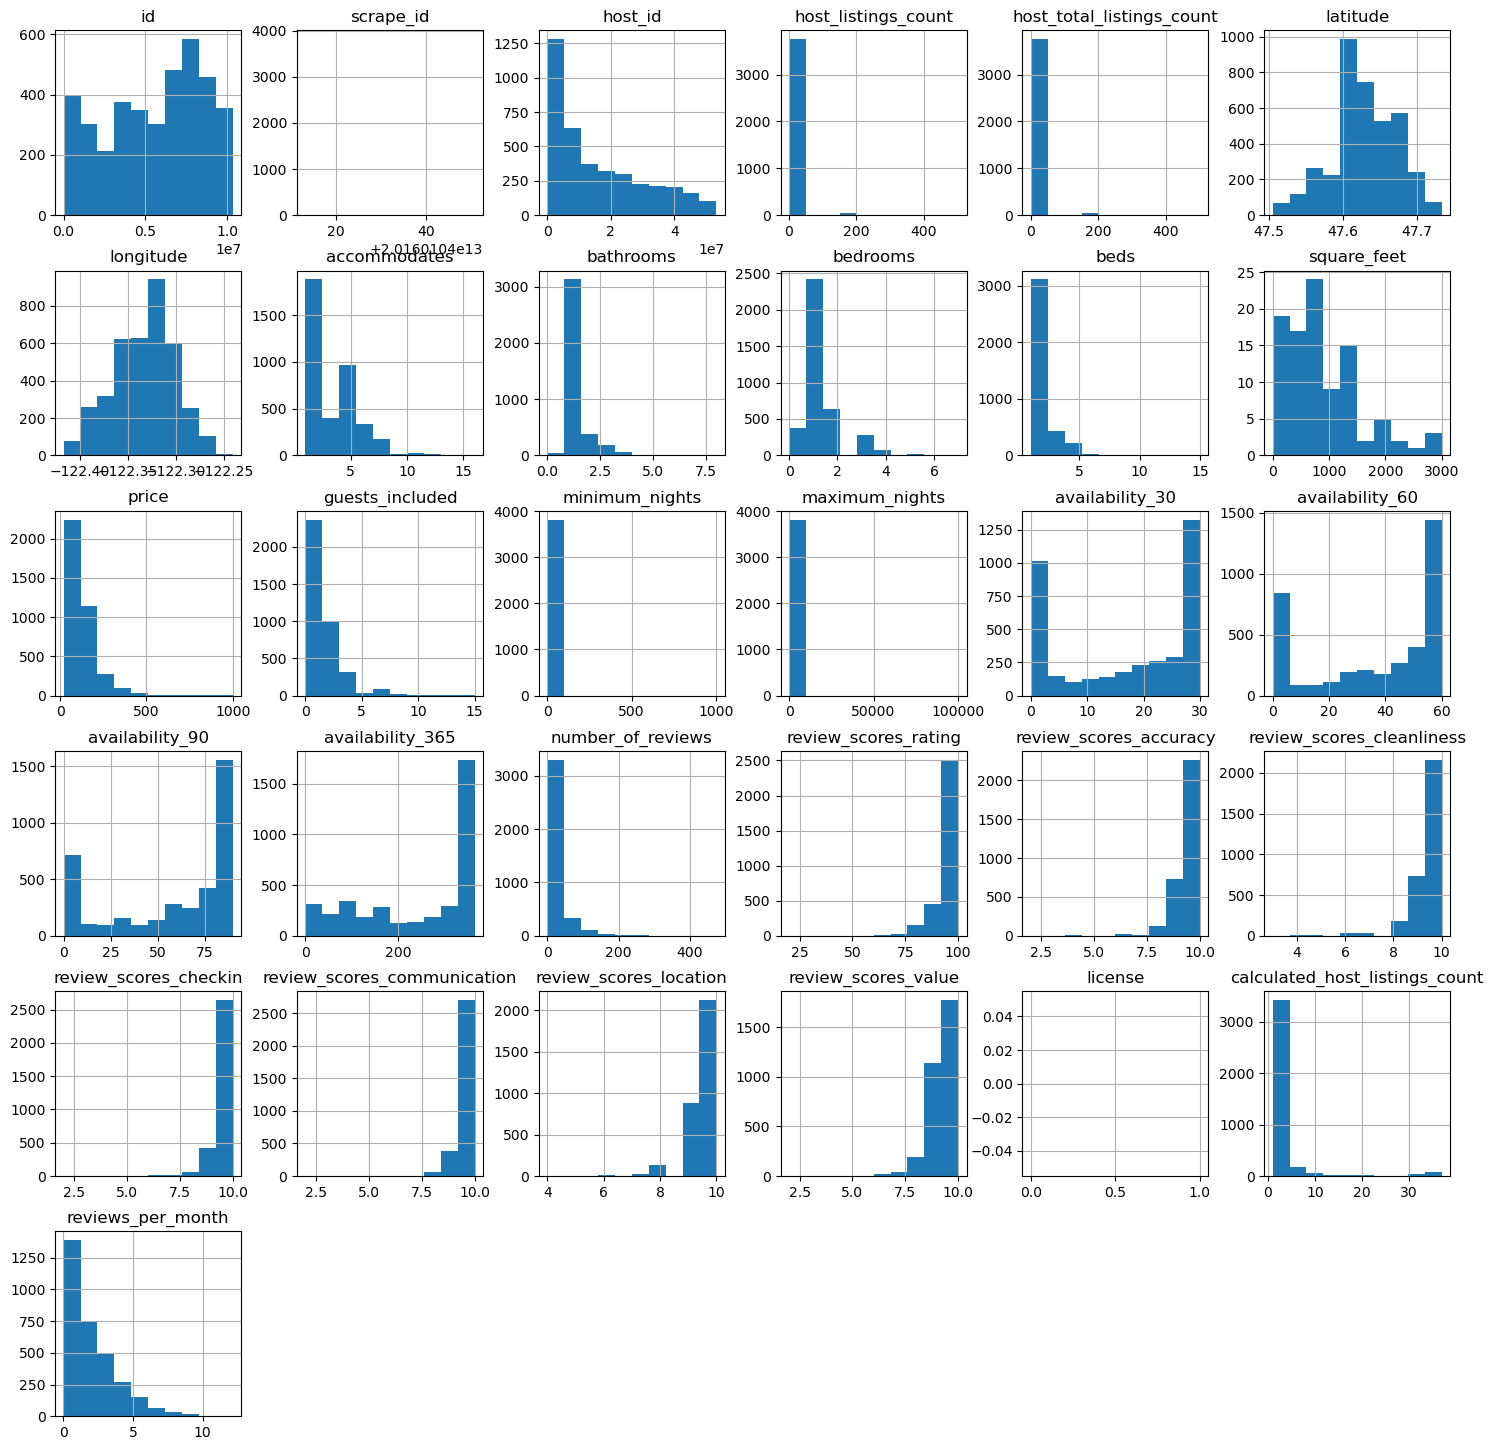

In [35]:
mydf.hist(figsize=(18,18))
plt.show()

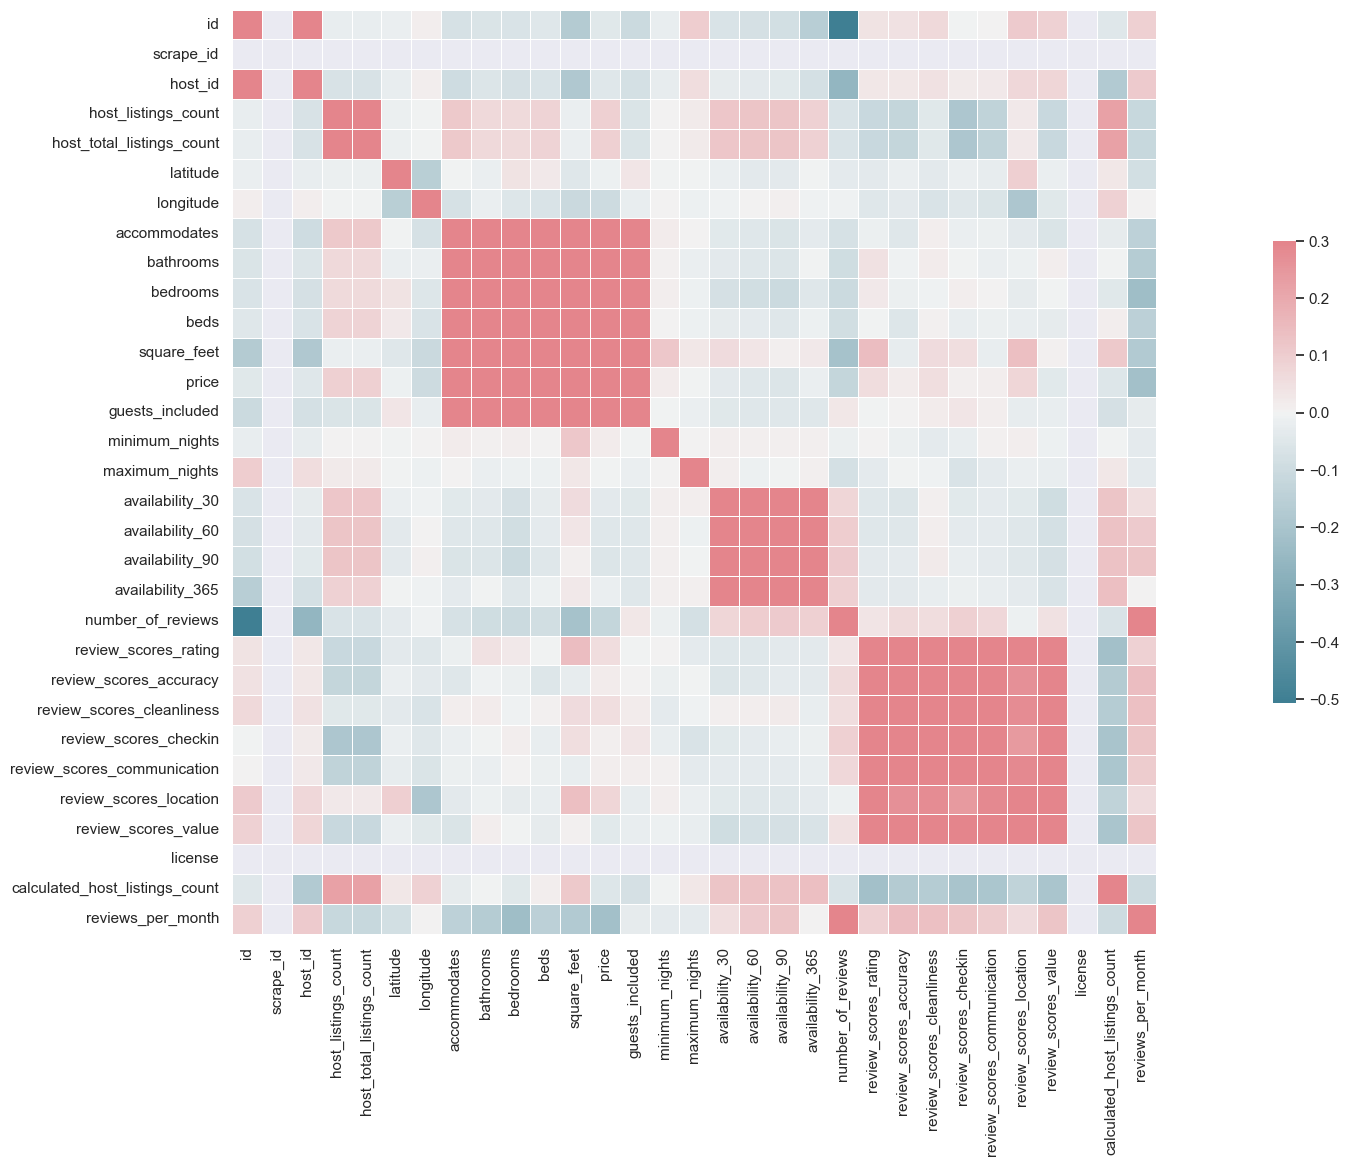

In [40]:
sns.set(style="dark")

d = mydf

# Correlation matrix
corr = d.corr()

# If we wanted to display a mask for the upper triangle
##mask = np.zeros_like(corr, dtype=np.bool)
####mask[np.triu_indices_from(mask)] = True

# Generate the matplotlib figure
f, ax = plt.subplots(figsize=(30, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with a aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Findings

Here for this question,we look into finding out the distribution of the different quantitative variables in the dataset and the correlation 
among all the features. The distribution clearly shows for example that the multitude of listings consisted of one bedrooms within 
1000 sq. feet and majority of the price was listed within 100–150 dollars. However the availability of the listings with the exception 
of one year before hand follow mostly a bimodal distribution where the availability is very high at the 
beginning and again high at the every end.

As we look into the correlation heatmap, we clearly see that some attributes or features in the dataset are explicitly correlated 
and the block matrixes below show for example number accommodates or number of bedrooms or number of bathrooms or beds and square 
feet and the price which is quite expected. 
Similarly review scores are correlated with each other.

#### Question-5

We like to find some prediction done on the data as what are the key predictors which determines the price of the listing?


###  Cleaning and Filtering the Dataset as first step

Based on some basic domain understanding we reduce the dimensionality of the data and  eliminate the  less relevant attributes corresponding to a listing
such as listing_id, listing_url, scrape_id etc.We set a threshold at 25% for dropping the columns. For imputing we 
more than 25% of the column with either mean or any other arbitrary value would introduce inaccuracy in the model.  

In [68]:
##########################selecting the relevant attributes based on some domain knowledge#######################
mydf_model = mydf[[
       'host_response_time', 'host_response_rate',
       'host_is_superhost', 'minimum_nights', 'maximum_nights', 
       'neighbourhood_group_cleansed', 
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 
       'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'reviews_per_month', 'amenities']]

######################dropping the columns that have more than 25% null values###############
percentage_na = mydf_model.isnull().sum(axis=0) / mydf_model.shape[0] * 100
missing_data_columns = percentage_na[percentage_na > 25].index.tolist()

mydf_model = mydf_model.drop(missing_data_columns, axis=1)
#print (seattle_airbnb_listings_regression.columns)

#######################removing the strings from the numerical columns######################
mydf_model['host_response_rate'] = mydf_model['host_response_rate'].str.replace("%", "").astype("float")
mydf_model['extra_people'] = mydf_model['extra_people'].str.replace("$", "").astype("float")

C:\Users\mitraind\AppData\Local\Temp\ipykernel_38464\2113802370.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mydf_model['extra_people'] = mydf_model['extra_people'].str.replace("$", "").astype("float")


We now want to figure out Extracting the different utilities offered by the airbnbs. Since each airbnb consists of a variety of utilities, the goal is to 
first prepare a list of unique amenities from the utilities column of the dataframe and then assign a 1/0to each listing depending on 
whether the particular utility is present in that listing. 

In [69]:
mydf_model.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'amenities'],
      dtype='object')

In [70]:
######################Function to find the unique utilities from the "amenities" column#####################
def unique_utilities(df):
  """
  Description: Finds the unique utiities from all the listings.

  Arguments
  ----------
  df : pandas dataframe
      pandas dataframe with amenities as the only column

  Returns
  ----------
  unique_utilities: list
      list of unique utilities             
  """
   
  unique = (df.str.strip("{}").unique().tolist())
  unique = [i.replace('"', '') for i in unique]
  total_unique =[]
  for unique_ in unique:
    if (unique_ != ''):
        unique_ = unique_.split(',')
        for str_ in unique_:
           total_unique.append(str_)
  unique_utilities = list(set(total_unique)) 
  return unique_utilities

In [71]:
##################The unique_utilities funtion is used to get a list of unique utilities####################
unique_utilities = unique_utilities(mydf_model.amenities)
print ("Unique Utilities")
print (unique_utilities)
############################For every unique amenity, add 1 if the amenity is present in the listing, zero otherwise
for col in unique_utilities:
    mydf_model[col] = mydf_model['amenities'].apply(lambda amenities: 1 if col in amenities else 0)
mydf_model.drop(['amenities', 'Pets live on this property'], axis=1, inplace=True)  

Unique Utilities
['Pool', 'Buzzer/Wireless Intercom', 'Gym', 'Wireless Internet', 'Family/Kid Friendly', 'Fire Extinguisher', '24-Hour Check-in', 'Elevator in Building', 'Cable TV', 'Safety Card', 'Laptop Friendly Workspace', 'Hangers', 'Hair Dryer', 'Lock on Bedroom Door', 'Air Conditioning', 'Smoking Allowed', 'Heating', 'TV', 'Carbon Monoxide Detector', 'Iron', 'Doorman', 'Kitchen', 'Free Parking on Premises', 'Essentials', 'Shampoo', 'Breakfast', 'Hot Tub', 'Dryer', 'Wheelchair Accessible', 'Suitable for Events', 'First Aid Kit', 'Washer / Dryer', 'Pets Allowed', 'Internet', 'Smoke Detector', 'Pets live on this property', 'Washer', 'Dog(s)', 'Indoor Fireplace', 'Other pet(s)', 'Cat(s)']


In [74]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
##############Get the numerical columns#######################
mydf_num = mydf_model.select_dtypes(include=numerics).columns.tolist()
##############Get the categorical columns#####################
mydf_cat = mydf_model.select_dtypes(include=['object', 'category']).columns.tolist()
print ("Numerical Columns ->")
print (mydf_num)
print ("Categorical Columns ->")
print (mydf_cat)

Numerical Columns ->
['host_response_rate', 'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'Pool', 'Buzzer/Wireless Intercom', 'Gym', 'Wireless Internet', 'Family/Kid Friendly', 'Fire Extinguisher', '24-Hour Check-in', 'Elevator in Building', 'Cable TV', 'Safety Card', 'Laptop Friendly Workspace', 'Hangers', 'Hair Dryer', 'Lock on Bedroom Door', 'Air Conditioning', 'Smoking Allowed', 'Heating', 'TV', 'Carbon Monoxide Detector', 'Iron', 'Doorman', 'Kitchen', 'Free Parking on Premises', 'Essentials', 'Shampoo', 'Breakfast', 'Hot Tub', 'Dryer', 'Wheelchair Accessible', 'Suitable for Events', 'First Aid Kit', 'Washer / Dryer', 'Pets Allowed', 'Internet', 'Smoke Detector', 'Washer', 'Dog(s)', 'Indoor Fireplac

['host_response_rate', 'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'Essentials', 'Wireless Internet', 'Washer / Dryer', 'Iron', 'Suitable for Events', 'Internet', 'Buzzer/Wireless Intercom', 'Hangers', 'First Aid Kit', 'Wheelchair Accessible', 'Smoke Detector', 'TV', 'Smoking Allowed', 'Cat(s)', 'Air Conditioning', 'Hot Tub', 'Dryer', 'Pool', 'Kitchen', 'Family/Kid Friendly', '24-Hour Check-in', 'Indoor Fireplace', 'Shampoo', 'Heating', 'Fire Extinguisher', 'Carbon Monoxide Detector', 'Safety Card', 'Pets Allowed', 'Hair Dryer', 'Washer', 'Doorman', 'Lock on Bedroom Door', 'Laptop Friendly Workspace', 'Other pet(s)', 'Dog(s)', 'Elevator in Building', 'Cable TV', 'Breakfast', 'Free Parking on Premises', 'Gym']
Categorical Columns ->
['host_response_time', 'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']

Now we encode the relevant categorical variables to numeric to do the analysis.For all the null values in the categorical columns, we add a column to indicate NaNs.

In [77]:
####################Convert the categorical columns to continuos variables###########################
mydf_reg = (pd.get_dummies(mydf_model, dummy_na=True, columns=mydf_cat, drop_first=True))
####################Drop those columns where all the row values are same##########################
nunique = mydf_reg.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
mydf_reg.drop(cols_to_drop, axis=1, inplace=True)

Next part of the data cleaning step is data imputation to fill the missing values. We use average filler imputation here However, if the columns has less than 
25% missing values, we fill it with the mean of that column. 

In [79]:
###################Fill the missing values in the numerical columns by the mean of the columns###################
columns = ['host_response_rate', 'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
for col in columns:
  mydf_reg[col].fillna(mydf_reg[col].mean(), inplace=True)

###  Creating Training & test data set as second step

In [82]:
#######################Prepare the train and the test data#####################
X, y = mydf_reg.drop(['price'], axis=1), mydf_reg[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#######################Scale the training data####################################
scaler = MinMaxScaler().fit(X_train)
scaler.fit(X_train)
X_train=scaler.transform(X_train)

######################Scale the test data#########################################
X_test=scaler.transform(X_test)

###   Create Functions to Compute the MSE & R-square and also generate the feature importance plots 

In [172]:
###################Function to compute the MSE and R2 scores for an input model#####################
#### ****** The function is mainly created from a stack overflow link usage ***** ########
def compute(X_train, y_train, X_test, y_test, model):
    """
    Description: Fits the model to the training data and computes MSE and R2 score.
    
    Arguments
    ----------
    X_train : ndarray of shape (n_train, n_features)
         Input featutres training data 
    y_train : ndarray of shape (n_train, 1)
         Target variable training data
    X_test : ndarray of shape (n_test, n_features)
         Input featutres test data
    y_test : ndarray of shape (n_test, 1)
         Target variable test data
    model : sklearn machine learning model  
         machine learning model to be fitted to the training data     
         
    Returns
    ----------
    model : sklearn machine learning model  
         trained machine learning model              
    """
    model.fit(X_train, y_train)
    y_pred_train = model.predict((X_train))
    mse = mean_squared_error(y_train, y_pred_train)
    r2 = r2_score(y_train, y_pred_train)
    print("Mean squared error for training data %f" % (mse))
    print('R2 training data %f' % r2)
    
    
    y_pred = model.predict((X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean squared error for test data %f" % mse)
    print('R2 test data %f' % r2)
    return model

###################Plot the important features pertaining to a given model#####################
def plot_feature_importance(importances, features):
    """
    Description: Plots the important features given the .
    
    Arguments
    ----------
    features : list
         list of input features  
    importances : ndarray of shape (n_features,)
         Stores the coefficient values/importance score corresponding to all the features. 
    """

    indices = np.argsort(importances)[::-1]
    names = [features[i] for i in indices]  
    plt.figure()
    plt.title("Feature Importance")
    plt.bar(range(len(importances[:10])), importances[indices][:10])
    plt.xticks(range(len(importances[:10])), names[:10], rotation=90)
    plt.show()

In [170]:
features = (X.columns.tolist())

### Linear Regression Model

Mean squared error for training data 3195.732672
R2 training data 0.607819
Mean squared error for test data 3197.486875
R2 test data 0.606042


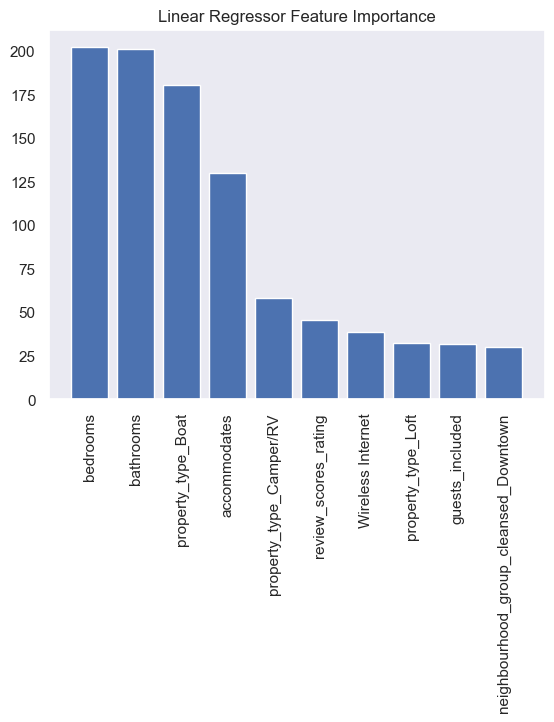

In [168]:
model = LinearRegression()
model =  compute(X_train, y_train, X_test, y_test, model)
# get important coefficients
importance = model.coef_
# plot important features based on the values of the coefficients
plot_feature_importance(importance[0], features)

C:\Users\mitraind\AppData\Local\Temp\ipykernel_38464\541771659.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean squared error for training data 2658.385404
R2 training data 0.673762
Mean squared error for test data 3362.673035
R2 test data 0.585689


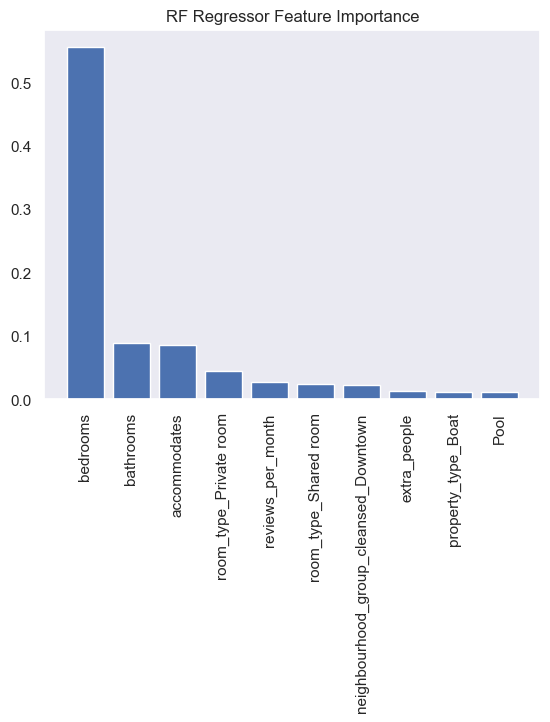

In [171]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model = (compute(X_train, y_train, X_test, y_test, model))
importance = model.feature_importances_
# plot important features
plot_feature_importance(importance, features)

### Findings

Looking at the the prediction fitting analysis we show above we clearly see that both the Linear Regression and the Random Forest Regression models give 
a R2 score of 0.6 (even on the training data), which is not a nice model. From both the models, the number of bedrooms, number of bathrooms and number of people that a listing can accomodate represent the three of the most important predictors. For linear regression we see the boat property type is important which can be a false positive. It is clear that we may be overfitting. Now to get rid of 
of underfitting we can improve on the following:

1. The dataset by all standards is pretty small by DS standards and we need more data
2. We may need to refine the model by stepwise regression to look into more relevant predictors.
3. Use feature selection methods to reduce the features. 
4. Some feature engineering strategy needs to be devised.
5. We may need to use other models to check and predict
6. May employ crossfold validation to improve existing models. 